In [ ]:
# Covering some of the material in Python Machine Learning, from PACKT Publishing
# starting with Chapter 02 - much of this code is taken directly from this text


In [1]:
import numpy as np

In [65]:
class Perceptron(object):
    """
    Perceptron classifier.
    
    Parameters:
    eta : float
        learning rate (between 0.0 and 1.0)
    n_iter : int
        passes over the training dataset
        
    Attributes:
    w_ : 1d-array
        weights after fitting
        
    errors_ : list
        number of misclassifications in every epoch
        
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data
        Parameters:
        X : array-like, shape = {n_samples, n_features}
        Training vectors, where n_samples is the number of samples and 
        n_features is the number of features 
        
        Y : array-like, shape = n_samples
        Target values
        
        Returns
        self : object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net_input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [7]:
# make sure this looks good
dir(Perceptron)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'fit',
 'net_input',
 'predict']

In [53]:
# import the iris dataset (of course)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [39]:
#df = pd.read_csv('https://github.com/plotly/datasets/blob/master/iris.csv', header=None)
df = pd.read_csv('C:/Users/Philip/Documents/Python Scripts/progs/python_scripts/machine_learning/iris.csv'
                 , header=None)

#SepalLength,SepalWidth,PetalLength,PetalWidth,Name

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
y = df.iloc[0:100, 4].values
print y[1:5]
y = np.where(y == 'Iris-setosa', -1, 1)
print y [1:5]

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[-1 -1 -1 -1]


In [50]:
# using two features (sepal length + petal length) in our design matrix
X = df.iloc[0:100, [0,2]].values
X[1:5]

array([[ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4]])

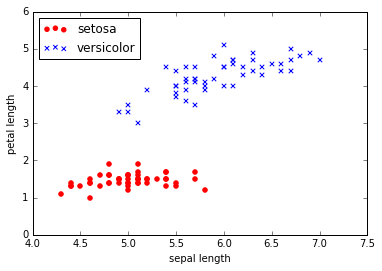

In [55]:
plt.scatter(X[:50, 0]
            , X[:50, 1]
            , color = 'red', marker = 'o', label = 'setosa'
           )
plt.scatter(X[50:100, 0]
            , X[50:100, 1]
            , color = "blue", marker = "x", label = "versicolor"
            )
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

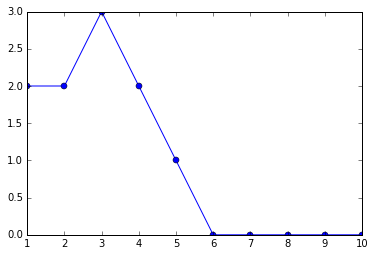

In [68]:
# train our perceptron algorithm on the Iris data we extracted and limited

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1)
         , ppn.errors_
         , marker = 'o'
         )

In [62]:
dir(ppn)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'erros_',
 'eta',
 'fit',
 'n_iter',
 'net_input',
 'predict',
 'w_']

In [75]:
# update the Perceptron class definition to make an Adaline perceptron definition

class AdalineGD(object):
    """
    Adaptive Linear Neuron Classifier
    
    Parameters:
    eta : float
        learning rate (between 0.0 and 1.0)
    n_iter : int
        passes over the training dataset
        
    Attributes:
    w_ : 1d-array
        weights after fitting
        
    errors_ : list
        number of misclassifications in every epoch
        
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data
        Parameters:
        X : array-like, shape = {n_samples, n_features}
        Training vectors, where n_samples is the number of samples and 
        n_features is the number of features 
        
        Y : array-like, shape = n_samples
        Target values
        
        Returns
        self : object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net_input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Comput linear activation """
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

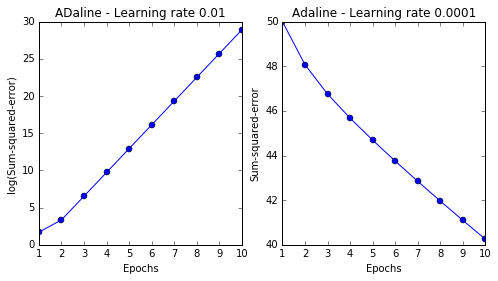

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1)
           , np.log10(ada1.cost_), marker="o"
          )
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('ADaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1)
          , ada2.cost_, marker="o"
          )
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')


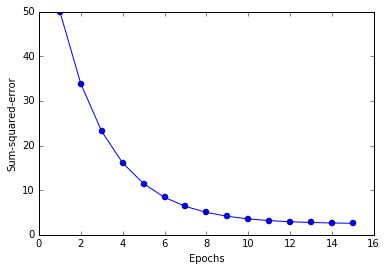

In [86]:
# Implement z-standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# retrain the adaline classifier
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plt.plot(range(1, len(ada.cost_) + 1)
        , ada.cost_, marker='o'
        )
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
